In [554]:
import numpy as np
import pandas as pd

In [629]:
from IPython.display import clear_output

In [663]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap

In [715]:
plt.rcParams.update({
    'font.family': 'serif',
})

In [556]:
plt.style.use('ggplot')

In [557]:
pd.options.display.float_format = '{:,.0f}'.format

In [558]:
filepath = '/Users/karoljarzabek/Downloads/'
file_name = 'rachunki_niefinansowe_wg_sektorow_instytucjonalnych_2010-2024_17-10-2024.xlsx'

# Czyszczenie danych

## Przedsiębiorstwa niefinansowe

### Przedsiębiorstwa niefin. - aktywa

In [559]:
# Extracting column names
non_fin_df_columns = pd.read_excel(filepath + file_name, sheet_name= 'S11',
                                        header=None, skiprows=5, nrows=1)
non_fin_df_columns = non_fin_df_columns.loc[0].to_numpy()
paid_non_fin_df_columns = non_fin_df_columns[[1,2,5,6,8,14,15,17,20,22,23]]

In [560]:
# Extracting index names
s11_index = pd.read_excel(filepath + file_name, sheet_name= 'S11',
                                        header=None, skiprows=13, usecols=[0])
s11_index = s11_index[0].to_list()
s11_index = [str(year).replace('kw', 'Q') for year in s11_index]

In [561]:
# Setting up the uses part of the table
paid_non_fin_df = pd.read_excel(filepath + file_name, sheet_name= 'S11',
                                header=None, skiprows=13,
                                usecols=[1,2,5,6,8,14,15,17,20,22,23])
paid_non_fin_df.columns = paid_non_fin_df_columns
paid_non_fin_df.index = s11_index
paid_non_fin_df

,Zużycie pośrednie,Akumulacja brutto,Koszty związane z zatrudnieniem,Podatki związane z produkcją i importem,Dochody z tytułu własności,"Podatki bieżące od dochodów, majątku itp.",Składki na ubezpieczenia społeczne i świadczenia społeczne,Pozostałe transfery bieżące,"Transfery kapitałowe, do zapłacenia",Amortyzacja środków trwałych,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych
2010-Q1,272620,22727,73819,3440,25800,9000,902,3601,5,24201,477
2010-Q2,310152,29420,77165,3550,22346,4385,910,3693,12,24573,844
2010-Q3,331619,30415,82044,3772,27787,6971,906,3487,11,24680,497
2010-Q4,334525,47490,79599,4070,28732,7775,904,3833,17,26578,1523
2010,1248916,130052,312627,14832,104665,28131,3622,14614,45,100032,3341
...,...,...,...,...,...,...,...,...,...,...,...
2024-Q1,813968,53086,226315,20534,50309,35993,2699,8451,0,67676,14503
2024-Q2,0,0,0,0,0,0,0,0,0,0,0
2024-Q3,0,0,0,0,0,0,0,0,0,0,0
2024-Q4,0,0,0,0,0,0,0,0,0,0,0


### Przedsiębiorstwa niefin. - pasywa

In [562]:
recv_non_fin_df_columns = non_fin_df_columns[[24,25,27,33,35,38,40]]

In [563]:
recv_non_fin_df = pd.read_excel(filepath + file_name, sheet_name= 'S11',
                                header=None, skiprows=13,
                                usecols=[24,25,27,33,35,38,40])
recv_non_fin_df.columns = recv_non_fin_df_columns
recv_non_fin_df.index = s11_index

In [564]:
recv_non_fin_df.head()

,Produkcja globalna,Dotacje,Dochody z tytułu własności,Składki na ubezpieczenia społeczne i świadczenia społeczne,Pozostałe transfery bieżące,"Transfery kapitałowe, do otrzymania",Amortyzacja środków trwałych
2010-Q1,416536,1750,3112,902,2323,2480,24201
2010-Q2,452985,1878,4167,910,7350,3024,24573
2010-Q3,476347,1686,3749,906,5687,3807,24680
2010-Q4,510403,1885,4899,904,3206,6540,26578
2010,1856271,7199,15927,3622,18566,15851,100032


### Przedsiębiorstwa niefin. - integracja

In [565]:
# Making sure the tables have the same sets of columns
paid_non_fin_df = paid_non_fin_df.reindex(columns=set(recv_non_fin_df.columns) | set(paid_non_fin_df.columns), fill_value=0)
recv_non_fin_df = recv_non_fin_df.reindex(columns=set(recv_non_fin_df.columns) | set(paid_non_fin_df.columns), fill_value=0)

In [566]:
# Creating and sorting integrated accounts table
int_non_fin_df = recv_non_fin_df - paid_non_fin_df
int_non_fin_df = int_non_fin_df.sort_index(axis=1)
int_non_fin_df['Suma'] = int_non_fin_df.sum(axis=1)

In [567]:
int_non_fin_df.head()

,Akumulacja brutto,Amortyzacja środków trwałych,Dochody z tytułu własności,Dotacje,Koszty związane z zatrudnieniem,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"Podatki bieżące od dochodów, majątku itp.",Podatki związane z produkcją i importem,Pozostałe transfery bieżące,Produkcja globalna,Składki na ubezpieczenia społeczne i świadczenia społeczne,"Transfery kapitałowe, do otrzymania","Transfery kapitałowe, do zapłacenia",Zużycie pośrednie,Suma
2010-Q1,-22727,0,-22688,1750,-73819,-477,-9000,-3440,-1278,416536,0,2480,-5,-272620,14712
2010-Q2,-29420,0,-18179,1878,-77165,-844,-4385,-3550,3657,452985,0,3024,-12,-310152,17837
2010-Q3,-30415,0,-24038,1686,-82044,-497,-6971,-3772,2200,476347,0,3807,-11,-331619,4673
2010-Q4,-47490,0,-23833,1885,-79599,-1523,-7775,-4070,-627,510403,0,6540,-17,-334525,19369
2010,-130052,0,-88738,7199,-312627,-3341,-28131,-14832,3952,1856271,0,15851,-45,-1248916,56591


## Instytucje finansowe

### Przedsiębiorstwa fin. - aktywa

In [568]:
# Extracting column names
fin_df_columns = pd.read_excel(filepath + file_name, sheet_name= 'S12',
                                        header=None, skiprows=5, nrows=1)
fin_df_columns = fin_df_columns.loc[0].to_numpy()
paid_fin_df_columns = fin_df_columns[[1,2,5,6,8,14,15,17,21,22,24,25]]

In [569]:
# Setting up the uses part of the table
paid_fin_df = pd.read_excel(filepath + file_name, sheet_name= 'S12',
                                header=None, skiprows=13,
                                usecols=[1,2,5,6,8,14,15,17,21,22,24,25])
paid_fin_df.columns = paid_fin_df_columns
paid_fin_df.index = s11_index

In [570]:
paid_fin_df.head()

,Zużycie pośrednie,Akumulacja brutto,Koszty związane z zatrudnieniem,Podatki związane z produkcją i importem,Dochody z tytułu własności,"Podatki bieżące od dochodów, majątku itp.",Składki na ubezpieczenia społeczne i świadczenia społeczne,Pozostałe transfery bieżące,Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,"Transfery kapitałowe, do zapłacenia",Amortyzacja środków trwałych,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych
2010-Q1,8949,944,5140,427,13277,1446,79,2657,6429,0,1356,9
2010-Q2,10170,1333,5283,117,22773,712,89,3472,8176,0,1370,9
2010-Q3,9753,1223,5318,120,19772,1445,88,5274,8712,0,1389,11
2010-Q4,13011,2228,6155,118,19133,1538,84,5264,7466,0,1431,22
2010,41883,5728,21896,782,74955,5141,340,16667,30783,0,5546,51


### Przedsiębiorstwa fin. - pasywa

In [571]:
recv_fin_df_columns = fin_df_columns[[26,27,29,35,37,41,43]]

In [572]:
recv_fin_df = pd.read_excel(filepath + file_name, sheet_name= 'S12',
                                header=None, skiprows=13,
                                usecols=[26,27,29,35,37,41,43])
recv_fin_df.columns = recv_fin_df_columns
recv_fin_df.index = s11_index

In [573]:
recv_fin_df.head()

,Produkcja globalna,Dotacje,Dochody z tytułu własności,Składki na ubezpieczenia społeczne i świadczenia społeczne,Pozostałe transfery bieżące,"Transfery kapitałowe, do otrzymania",Amortyzacja środków trwałych
2010-Q1,20808,16,13539,6508,2628,62,1356
2010-Q2,22660,22,20008,8265,3466,86,1370
2010-Q3,25012,19,14782,8800,5263,117,1389
2010-Q4,26483,20,16915,7551,5244,178,1431
2010,94963,77,65244,31124,16601,443,5546


### Przedsiębiorstwa fin. - integracja

In [574]:
# Making sure the tables have the same sets of columns
paid_fin_df = paid_fin_df.reindex(columns=set(recv_fin_df.columns) | set(paid_fin_df.columns), fill_value=0)
recv_fin_df = recv_fin_df.reindex(columns=set(recv_fin_df.columns) | set(paid_fin_df.columns), fill_value=0)

In [575]:
# Creating and sorting integrated accounts table
int_fin_df = recv_fin_df - paid_fin_df
int_fin_df = int_fin_df.sort_index(axis=1)
int_fin_df['Suma'] = int_fin_df.sum(axis=1)

In [576]:
int_fin_df.head()

,Akumulacja brutto,Amortyzacja środków trwałych,Dochody z tytułu własności,Dotacje,Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,Koszty związane z zatrudnieniem,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"Podatki bieżące od dochodów, majątku itp.",Podatki związane z produkcją i importem,Pozostałe transfery bieżące,Produkcja globalna,Składki na ubezpieczenia społeczne i świadczenia społeczne,"Transfery kapitałowe, do otrzymania","Transfery kapitałowe, do zapłacenia",Zużycie pośrednie,Suma
2010-Q1,-944,0,262,16,-6429,-5140,-9,-1446,-427,-29,20808,6429,62,0,-8949,4204
2010-Q2,-1333,0,-2765,22,-8176,-5283,-9,-712,-117,-6,22660,8176,86,0,-10170,2373
2010-Q3,-1223,0,-4990,19,-8712,-5318,-11,-1445,-120,-11,25012,8712,117,0,-9753,2277
2010-Q4,-2228,0,-2218,20,-7466,-6155,-22,-1538,-118,-20,26483,7467,178,0,-13011,1372
2010,-5728,0,-9711,77,-30783,-21896,-51,-5141,-782,-66,94963,30784,443,0,-41883,10226


## General Government

### General Government - aktywa

In [577]:
# Extracting column names
gov_df_columns = pd.read_excel(filepath + file_name, sheet_name= 'S13',
                                        header=None, skiprows=5, nrows=1)
gov_df_columns = gov_df_columns.loc[0].to_numpy()
paid_gov_df_columns = gov_df_columns[[1,2,5,8,9,11,14,18,19,24,28,30,31]]

In [578]:
# Setting up the uses part of the table
paid_gov_df = pd.read_excel(filepath + file_name, sheet_name= 'S13',
                                header=None, skiprows=13,
                                usecols=[1,4,5,8,9,11,14,18,19,24,28,30,31])
paid_gov_df.columns = paid_gov_df_columns
paid_gov_df.index = s11_index

In [579]:
paid_gov_df.head()

,Zużycie pośrednie,Spożycie,Akumulacja brutto,Koszty związane z zatrudnieniem,Podatki związane z produkcją i importem,Dotacje,Dochody z tytułu własności,"Podatki bieżące od dochodów, majątku itp.",Składki na ubezpieczenia społeczne i świadczenia społeczne,Pozostałe transfery bieżące,"Transfery kapitałowe, do zapłacenia",Amortyzacja środków trwałych,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych
2010-Q1,22533,30604,8735,37336,640,4163,6918,80,87532,6128,1468,8363,477
2010-Q2,20286,31101,15636,39204,376,2682,11036,53,88549,9190,1820,8494,-126
2010-Q3,23056,31759,17983,38277,405,2408,7290,46,88980,7130,1975,8558,692
2010-Q4,24579,36342,41249,46204,356,3748,10782,55,94227,7073,3835,8790,-1885
2010,90454,129806,83603,161021,1777,13001,36026,234,359288,29521,9098,34205,-842


### General Government - pasywa

In [580]:
recv_gov_df_columns = gov_df_columns[[33,35,39,41,47,48,50,54,57]]

In [581]:
recv_gov_df = pd.read_excel(filepath + file_name, sheet_name= 'S13',
                                header=None, skiprows=13,
                                usecols=[33,35,39,41,47,48,50,54,57])
recv_gov_df.columns = recv_gov_df_columns
recv_gov_df.index = s11_index

In [582]:
recv_gov_df.head()

,Produkcja globalna,Podatki związane z produkcją i importem,Dotacje,Dochody z tytułu własności,"Podatki bieżące od dochodów, majątku itp.",Składki na ubezpieczenia społeczne i świadczenia społeczne,Pozostałe transfery bieżące,"Transfery kapitałowe, do otrzymania",Amortyzacja środków trwałych
2010-Q1,69058,44328,0,"4,087",25962,43511,5085,1923,8363
2010-Q2,68649,48372,0,"3,847",18334,44659,5172,3091,8494
2010-Q3,70577,50952,0,"2,721",25642,42991,4115,4904,8558
2010-Q4,80129,55038,0,"3,501",26611,40112,5720,6818,8790
2010,288413,198690,0,"14,156",96549,171273,20092,16736,34205


### General Government - integracja

In [583]:
# Making sure the tables have the same sets of columns
paid_gov_df = paid_gov_df.reindex(columns=set(recv_gov_df.columns) | set(paid_gov_df.columns), fill_value=0)
recv_gov_df = recv_gov_df.reindex(columns=set(recv_gov_df.columns) | set(paid_gov_df.columns), fill_value=0)

In [584]:
# Creating and sorting integrated accounts table
int_gov_df = recv_gov_df - paid_gov_df
int_gov_df = int_gov_df.sort_index(axis=1)
int_gov_df['Suma'] = int_gov_df.sum(axis=1)

In [585]:
int_gov_df.head()

,Akumulacja brutto,Amortyzacja środków trwałych,Dochody z tytułu własności,Dotacje,Koszty związane z zatrudnieniem,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"Podatki bieżące od dochodów, majątku itp.",Podatki związane z produkcją i importem,Pozostałe transfery bieżące,Produkcja globalna,Składki na ubezpieczenia społeczne i świadczenia społeczne,Spożycie,"Transfery kapitałowe, do zapłacenia","Transfery kapitałowe, do otrzymania",Zużycie pośrednie,Suma
2010-Q1,-8735,0,"-2,831",-4163,-37336,-477,25882,43688,-1043,69058,-44021,-30604,-1468,1923,-22533,"-12,660"
2010-Q2,-15636,0,"-7,189",-2682,-39204,126,18281,47996,-4018,68649,-43890,-31101,-1820,3091,-20286,"-27,683"
2010-Q3,-17983,0,"-4,569",-2408,-38277,-692,25596,50547,-3015,70577,-45989,-31759,-1975,4904,-23056,"-18,099"
2010-Q4,-41249,0,"-7,281",-3748,-46204,1885,26556,54682,-1353,80129,-54115,-36342,-3835,6818,-24579,"-48,636"
2010,-83603,0,"-21,870",-13001,-161021,842,96315,196913,-9429,288413,-188015,-129806,-9098,16736,-90454,"-107,078"


## Gospodarstwa domowe

### Gospodarstwa domowe - aktywa

In [586]:
# Extracting column names
house_df_columns = pd.read_excel(filepath + file_name, sheet_name= 'S14+S15',
                                        header=None, skiprows=5, nrows=1)
house_df_columns = house_df_columns.loc[0].to_numpy()
paid_house_df_columns = house_df_columns[[1,2,4,7,8,10,14,15,19,22,25,26]]

In [587]:
# Setting up the uses part of the table
paid_house_df = pd.read_excel(filepath + file_name, sheet_name= 'S14+S15',
                                header=None, skiprows=13,
                                usecols=[1,2,4,7,8,10,14,15,19,22,25,26])
paid_house_df.columns = paid_house_df_columns
paid_house_df.index = s11_index

/Users/karoljarzabek/nlppy/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/karoljarzabek/nlppy/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [588]:
paid_house_df.head()

,Zużycie pośrednie,Spożycie,Akumulacja brutto,Koszty związane z zatrudnieniem,Podatki związane z produkcją i importem,Dochody z tytułu własności,"Podatki bieżące od dochodów, majątku itp.",Składki na ubezpieczenia społeczne i świadczenia społeczne,Pozostałe transfery bieżące,"Transfery kapitałowe, do zapłacenia",Amortyzacja środków trwałych,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych
2010-Q1,47042,224893,11323,13922,1126,3503,15463,54876,3939,88,5859,-873
2010-Q2,63477,220616,19682,13829,1034,3119,13330,58294,4335,96,5927,-621
2010-Q3,65056,227123,20734,13570,987,2720,17334,57181,5064,105,5945,"-1,139"
2010-Q4,68479,218580,29766,15605,1004,3269,17337,52544,5054,117,6002,874
2010,244054,891212,81505,56926,4151,12611,63464,222895,18392,406,23733,"-1,759"


### Gospodarstwa domowe - pasywa

In [589]:
recv_house_df_columns = house_df_columns[[27,28,29,31,36,40,43,44,46]]

In [590]:
recv_house_df = pd.read_excel(filepath + file_name, sheet_name= 'S14+S15',
                                header=None, skiprows=13,
                                usecols=[27,28,29,31,36,40,43,44,46])
recv_house_df.columns = recv_house_df_columns
recv_house_df.index = s11_index

/Users/karoljarzabek/nlppy/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/karoljarzabek/nlppy/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [591]:
recv_house_df.head()

,Produkcja globalna,Koszty związane z zatrudnieniem,Dotacje,Dochody z tytułu własności,Składki na ubezpieczenia społeczne i świadczenia społeczne,Pozostałe transfery bieżące,Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,"Transfery kapitałowe, do otrzymania",Amortyzacja środków trwałych
2010-Q1,136372,131489,4374,13242,92370,6452,6429,755,5859
2010-Q2,163792,138009,903,16229,93665,7815,8176,983,5927
2010-Q3,166191,141899,640,17081,94075,8397,8712,1045,5945
2010-Q4,179851,149528,4323,17941,98932,7984,7466,1828,6002
2010,646206,560925,10240,64493,379042,30648,30783,4611,23733


### Gospodarstwa domowe - integracja

In [592]:
# Making sure the tables have the same sets of columns
paid_house_df = paid_house_df.reindex(columns=set(recv_house_df.columns) | set(paid_house_df.columns), fill_value=0)
recv_house_df = recv_house_df.reindex(columns=set(recv_house_df.columns) | set(paid_house_df.columns), fill_value=0)

In [593]:
# Creating and sorting integrated accounts table
int_house_df = recv_house_df - paid_house_df
int_house_df = int_house_df.sort_index(axis=1)
int_house_df['Suma'] = int_house_df.sum(axis=1)

In [594]:
int_house_df.head()

,Akumulacja brutto,Amortyzacja środków trwałych,Dochody z tytułu własności,Dotacje,Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,Koszty związane z zatrudnieniem,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"Podatki bieżące od dochodów, majątku itp.",Podatki związane z produkcją i importem,Pozostałe transfery bieżące,Produkcja globalna,Składki na ubezpieczenia społeczne i świadczenia społeczne,Spożycie,"Transfery kapitałowe, do otrzymania","Transfery kapitałowe, do zapłacenia",Zużycie pośrednie,Suma
2010-Q1,-11323,0,9739,4374,6429,117567,873,-15463,-1126,2513,136372,37494,-224893,755,-88,-47042,"16,181"
2010-Q2,-19682,0,13110,903,8176,124180,621,-13330,-1034,3480,163792,35371,-220616,983,-96,-63477,"32,381"
2010-Q3,-20734,0,14361,640,8712,128329,"1,139",-17334,-987,3333,166191,36894,-227123,1045,-105,-65056,"29,305"
2010-Q4,-29766,0,14672,4323,7466,133923,-874,-17337,-1004,2930,179851,46388,-218580,1828,-117,-68479,"55,224"
2010,-81505,0,51882,10240,30783,503999,"1,759",-63464,-4151,12256,646206,156147,-891212,4611,-406,-244054,"133,091"


## Zagranica

### Zagranica - aktywa

In [595]:
# Extracting column names
rest_df_columns = pd.read_excel(filepath + file_name, sheet_name= 'S2',
                                        header=None, skiprows=5, nrows=1)
rest_df_columns = rest_df_columns.loc[0].to_numpy()
paid_rest_df_columns = rest_df_columns[[1,4,5,8,14,15,18,22,23,24]]

In [596]:
# Setting up the uses part of the table
paid_rest_df = pd.read_excel(filepath + file_name, sheet_name= 'S2',
                                header=None, skiprows=13,
                                usecols=[1,4,5,8,14,15,18,22,23,24])
paid_rest_df.columns = paid_rest_df_columns
paid_rest_df.index = s11_index

In [597]:
paid_rest_df.head()

,Eksport towarów i usług,Koszty związane z zatrudnieniem,Dotacje,Dochody z tytułu własności,"Podatki bieżące od dochodów, majątku itp.",Składki na ubezpieczenia społeczne i świadczenia społeczne,Pozostałe transfery bieżące,Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,"Transfery kapitałowe, do zapłacenia",Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych
2010-Q1,"128,414",2015,4584,"3,044",208,265,5660,0,3659,-90
2010-Q2,"145,314",3380,556,"2,903",193,216,6095,0,5256,-106
2010-Q3,"148,539",3857,205,"3,461",204,245,5957,0,7782,-61
2010-Q4,"152,792",2924,4194,"3,463",204,237,6170,0,11395,-534
2010,"575,059",12176,9539,"12,871",809,963,23882,0,28092,-791


### Zagranica - pasywa

In [598]:
recv_rest_df_columns = rest_df_columns[[25,28,31,37,38,41,45,46]]

In [599]:
recv_rest_df = pd.read_excel(filepath + file_name, sheet_name= 'S2',
                                header=None, skiprows=13,
                                usecols=[25,28,31,37,38,41,45,46])
recv_rest_df.columns = recv_rest_df_columns
recv_rest_df.index = s11_index

In [600]:
recv_rest_df.head()

,Import towarów i usług,Koszty związane z zatrudnieniem,Dochody z tytułu własności,"Podatki bieżące od dochodów, majątku itp.",Składki na ubezpieczenia społeczne i świadczenia społeczne,Pozostałe transfery bieżące,Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,"Transfery kapitałowe, do otrzymania"
2010-Q1,"134,020",743,"18,562",235,363,5497,0,0
2010-Q2,"150,946",852,"17,925",339,559,2982,0,0
2010-Q3,"159,169",1167,"22,697",358,628,3450,0,0
2010-Q4,"164,925",959,"22,123",298,497,5240,0,0
2010,"609,059",3721,"81,307",1230,2047,17169,0,0


### Zagranica - integracja

In [601]:
# Making sure the tables have the same sets of columns
paid_rest_df = paid_rest_df.reindex(columns=set(recv_rest_df.columns) | set(paid_rest_df.columns), fill_value=0)
recv_rest_df = recv_rest_df.reindex(columns=set(recv_rest_df.columns) | set(paid_rest_df.columns), fill_value=0)

In [602]:
paid_rest_df

,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,Składki na ubezpieczenia społeczne i świadczenia społeczne,Dochody z tytułu własności,Eksport towarów i usług,"Transfery kapitałowe, do zapłacenia",Import towarów i usług,"Podatki bieżące od dochodów, majątku itp.",Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,Pozostałe transfery bieżące,Dotacje,"Transfery kapitałowe, do otrzymania",Koszty związane z zatrudnieniem
2010-Q1,-90,265,"3,044","128,414",3659,0,208,0,5660,4584,0,2015
2010-Q2,-106,216,"2,903","145,314",5256,0,193,0,6095,556,0,3380
2010-Q3,-61,245,"3,461","148,539",7782,0,204,0,5957,205,0,3857
2010-Q4,-534,237,"3,463","152,792",11395,0,204,0,6170,4194,0,2924
2010,-791,963,"12,871","575,059",28092,0,809,0,23882,9539,0,12176
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-Q1,-13074,1196,"12,514","464,532",4556,0,345,0,8556,3324,0,3804
2024-Q2,0,0,0,0,0,0,0,0,0,0,0,0
2024-Q3,0,0,0,0,0,0,0,0,0,0,0,0
2024-Q4,0,0,0,0,0,0,0,0,0,0,0,0


In [603]:
# Creating and sorting integrated accounts table
int_rest_df = recv_rest_df - paid_rest_df
int_rest_df = int_rest_df.sort_index(axis=1)
int_rest_df['Suma'] = int_rest_df.sum(axis=1)

In [604]:
int_rest_df.head()

,Dochody z tytułu własności,Dotacje,Eksport towarów i usług,Import towarów i usług,Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,Koszty związane z zatrudnieniem,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"Podatki bieżące od dochodów, majątku itp.",Pozostałe transfery bieżące,Składki na ubezpieczenia społeczne i świadczenia społeczne,"Transfery kapitałowe, do otrzymania","Transfery kapitałowe, do zapłacenia",Suma
2010-Q1,"15,518",-4584,"-128,414","134,020",0,-1272,90,27,-163,98,0,-3659,"11,661"
2010-Q2,"15,022",-556,"-145,314","150,946",0,-2528,106,146,-3113,343,0,-5256,"9,796"
2010-Q3,"19,236",-205,"-148,539","159,169",0,-2690,61,154,-2507,383,0,-7782,"17,280"
2010-Q4,"18,660",-4194,"-152,792","164,925",0,-1965,534,94,-930,260,0,-11395,"13,197"
2010,"68,436",-9539,"-575,059","609,059",0,-8455,791,421,-6713,1084,0,-28092,"51,934"


## Brak sektora

### Brak sektora - aktywa

In [605]:
# Extracting column names
brak_df_columns = pd.read_excel(filepath + file_name, sheet_name= 'S1N',
                                        header=None, skiprows=5, nrows=1)
brak_df_columns = brak_df_columns.loc[0].to_numpy()
paid_brak_df_columns = brak_df_columns[[1]]

In [606]:
# Setting up the uses part of the table
paid_brak_df = pd.read_excel(filepath + file_name, sheet_name= 'S1N',
                                header=None, skiprows=11,
                                usecols=[1])
paid_brak_df.columns = paid_brak_df_columns
paid_brak_df.index = s11_index

In [607]:
paid_brak_df.head()

,Podatki związane z produkcją i importem
2010-Q1,39128
2010-Q2,43682
2010-Q3,46066
2010-Q4,49971
2010,178847


### Brak sektora - pasywa

In [608]:
recv_brak_df_columns = brak_df_columns[[3]]

In [609]:
recv_brak_df = pd.read_excel(filepath + file_name, sheet_name= 'S1N',
                                header=None, skiprows=11,
                                usecols=[3])
recv_brak_df.columns = recv_brak_df_columns
recv_brak_df.index = s11_index

In [610]:
recv_brak_df.head()

,Dotacje
2010-Q1,2607
2010-Q2,435
2010-Q3,268
2010-Q4,1715
2010,5025


### Brak sektora - integracja

In [611]:
# Making sure the tables have the same sets of columns
paid_brak_df = paid_brak_df.reindex(columns=set(recv_brak_df.columns) | set(paid_brak_df.columns), fill_value=0)
recv_brak_df = recv_brak_df.reindex(columns=set(recv_brak_df.columns) | set(paid_brak_df.columns), fill_value=0)

In [612]:
# Creating and sorting integrated accounts table
int_brak_df = recv_brak_df - paid_brak_df
int_brak_df = int_brak_df.sort_index(axis=1)
int_brak_df['Suma'] = int_brak_df.sum(axis=1)

In [613]:
int_brak_df.head()

,Dotacje,Podatki związane z produkcją i importem,Suma
2010-Q1,2607,-39128,-36521
2010-Q2,435,-43682,-43247
2010-Q3,268,-46066,-45798
2010-Q4,1715,-49971,-48256
2010,5025,-178847,-173822


# Tworzenie TFC

## Przegląd

In [614]:
int_non_fin_df.head(1)

,Akumulacja brutto,Amortyzacja środków trwałych,Dochody z tytułu własności,Dotacje,Koszty związane z zatrudnieniem,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"Podatki bieżące od dochodów, majątku itp.",Podatki związane z produkcją i importem,Pozostałe transfery bieżące,Produkcja globalna,Składki na ubezpieczenia społeczne i świadczenia społeczne,"Transfery kapitałowe, do otrzymania","Transfery kapitałowe, do zapłacenia",Zużycie pośrednie,Suma
2010-Q1,-22727,0,-22688,1750,-73819,-477,-9000,-3440,-1278,416536,0,2480,-5,-272620,14712


In [615]:
int_fin_df.head(1)

,Akumulacja brutto,Amortyzacja środków trwałych,Dochody z tytułu własności,Dotacje,Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,Koszty związane z zatrudnieniem,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"Podatki bieżące od dochodów, majątku itp.",Podatki związane z produkcją i importem,Pozostałe transfery bieżące,Produkcja globalna,Składki na ubezpieczenia społeczne i świadczenia społeczne,"Transfery kapitałowe, do otrzymania","Transfery kapitałowe, do zapłacenia",Zużycie pośrednie,Suma
2010-Q1,-944,0,262,16,-6429,-5140,-9,-1446,-427,-29,20808,6429,62,0,-8949,4204


In [616]:
int_gov_df.tail(10)

,Akumulacja brutto,Amortyzacja środków trwałych,Dochody z tytułu własności,Dotacje,Koszty związane z zatrudnieniem,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"Podatki bieżące od dochodów, majątku itp.",Podatki związane z produkcją i importem,Pozostałe transfery bieżące,Produkcja globalna,Składki na ubezpieczenia społeczne i świadczenia społeczne,Spożycie,"Transfery kapitałowe, do zapłacenia","Transfery kapitałowe, do otrzymania",Zużycie pośrednie,Suma
2023-Q1,-21216,0,"-3,115",-16165,-75078,803,44145,110899,636,139763,-80492,-60378,-6146,4453,-45392,"-7,283"
2023-Q2,-29692,0,"-8,104",-16534,-79542,624,71513,115861,-10316,147970,-96758,-66114,-16405,8185,-49274,"-28,586"
2023-Q3,-37390,0,"-6,888",-14591,-81440,10,63494,124184,-8628,150163,-110505,-69284,-13306,7586,-49313,"-45,908"
2023-Q4,-82902,0,"-16,526",-23097,-108639,759,73285,125526,5330,204622,-116077,-82281,-12235,15598,-75793,"-92,430"
2023,-171200,0,"-34,633",-70387,-344699,2196,252437,476470,-12978,642518,-403832,-278057,-48092,35822,-219772,"-174,207"
2024-Q1,-23745,0,"-7,447",-13284,-90373,803,73719,125343,-5920,159830,-96987,-70060,-7956,2255,-48727,"-2,549"
2024-Q2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2024-Q3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2024-Q4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2024,-23745,0,"-7,447",-13284,-90373,803,73719,125343,-5920,159830,-96987,-70060,-7956,2255,-48727,"-2,549"


In [617]:
int_house_df.head(1)

,Akumulacja brutto,Amortyzacja środków trwałych,Dochody z tytułu własności,Dotacje,Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,Koszty związane z zatrudnieniem,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"Podatki bieżące od dochodów, majątku itp.",Podatki związane z produkcją i importem,Pozostałe transfery bieżące,Produkcja globalna,Składki na ubezpieczenia społeczne i świadczenia społeczne,Spożycie,"Transfery kapitałowe, do otrzymania","Transfery kapitałowe, do zapłacenia",Zużycie pośrednie,Suma
2010-Q1,-11323,0,9739,4374,6429,117567,873,-15463,-1126,2513,136372,37494,-224893,755,-88,-47042,"16,181"


In [618]:
int_rest_df.head(1)

,Dochody z tytułu własności,Dotacje,Eksport towarów i usług,Import towarów i usług,Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,Koszty związane z zatrudnieniem,Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"Podatki bieżące od dochodów, majątku itp.",Pozostałe transfery bieżące,Składki na ubezpieczenia społeczne i świadczenia społeczne,"Transfery kapitałowe, do otrzymania","Transfery kapitałowe, do zapłacenia",Suma
2010-Q1,"15,518",-4584,"-128,414","134,020",0,-1272,90,27,-163,98,0,-3659,"11,661"


In [619]:
int_brak_df.head(1)

,Dotacje,Podatki związane z produkcją i importem,Suma
2010-Q1,2607,-39128,-36521


## Ujednolicenie

In [620]:
int_non_fin_df.columns = int_non_fin_df.columns.str.strip()
int_fin_df.columns = int_fin_df.columns.str.strip()
int_gov_df.columns = int_gov_df.columns.str.strip()
int_house_df.columns = int_house_df.columns.str.strip()
int_rest_df.columns = int_rest_df.columns.str.strip()


In [621]:
### Dodawanie brakujących kolumn
int_non_fin_df = int_non_fin_df.reindex(columns=set(int_non_fin_df.columns) | set(int_fin_df.columns) |
                                        set(int_gov_df.columns) | set(int_house_df.columns) |
                                        set(int_rest_df.columns) | set(int_brak_df.columns), fill_value=0).drop(columns='Suma', axis=1)
##
int_fin_df = int_fin_df.reindex(columns=set(int_non_fin_df.columns) | set(int_fin_df.columns) |
                                        set(int_gov_df.columns) | set(int_house_df.columns) |
                                        set(int_rest_df.columns) | set(int_brak_df.columns), fill_value=0).drop(columns='Suma', axis=1)
##
int_gov_df = int_gov_df.reindex(columns=set(int_non_fin_df.columns) | set(int_fin_df.columns) |
                                        set(int_gov_df.columns) | set(int_house_df.columns) |
                                        set(int_rest_df.columns) | set(int_brak_df.columns), fill_value=0).drop(columns='Suma', axis=1)
##
int_house_df = int_house_df.reindex(columns=set(int_non_fin_df.columns) | set(int_fin_df.columns) |
                                        set(int_gov_df.columns) | set(int_house_df.columns) |
                                        set(int_rest_df.columns) | set(int_brak_df.columns), fill_value=0).drop(columns='Suma', axis=1)
##
int_rest_df = int_rest_df.reindex(columns=set(int_non_fin_df.columns) | set(int_fin_df.columns) |
                                        set(int_gov_df.columns) | set(int_house_df.columns) |
                                        set(int_rest_df.columns) | set(int_brak_df.columns), fill_value=0).drop(columns='Suma', axis=1)
##
int_brak_df = int_brak_df.reindex(columns=set(int_non_fin_df.columns) | set(int_fin_df.columns) |
                                        set(int_gov_df.columns) | set(int_house_df.columns) |
                                        set(int_rest_df.columns) | set(int_brak_df.columns), fill_value=0).drop(columns='Suma', axis=1)
##

In [622]:
int_non_fin_df = int_non_fin_df.sort_index(axis=1)
int_fin_df = int_fin_df.sort_index(axis=1)
int_gov_df = int_gov_df.sort_index(axis=1)
int_house_df = int_house_df.sort_index(axis=1)
int_rest_df = int_rest_df.sort_index(axis=1)
int_brak_df = int_brak_df.sort_index(axis=1)

## TFC function

In [623]:
def create_TFC_df_year(year):
    df = pd.DataFrame({
            'Przedsiębiorstwa' : int_non_fin_df.loc[year].to_numpy(),
            'Instytucje finansowe' : int_fin_df.loc[year].to_numpy(),
            'Państwo' : int_gov_df.loc[year].to_numpy(),
            'Gospodarstwa domowe' : int_house_df.loc[year].to_numpy(),
            'Zagranica' : int_rest_df.loc[year].to_numpy(),
            'Brak sektora' : int_brak_df.loc[year].to_numpy(),

    })
    df.index = int_non_fin_df.columns
#     df.index = ['D6 Składki na ubezpieczenia społeczne i świadczenia społeczne',
#        'D4 Dochody z tytułu własności', 'D9 Transfery kapitałowe, do  zapłacenia',
#        'P2 Zużycie pośrednie', 'P3 Spożycie', 'P51C Amortyzacja środków trwałych',
#        'D5 Podatki bieżące od dochodów, majątku itp.', 'P1 Produkcja globalna',
#        'D7 Pozostałe transfery bieżące',
#        'D8 Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych',
#        'D3 Dotacje',
#        'NP Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych',
#        'D1 Koszty związane z zatrudnieniem', 'P6 Eksport towarów i usług',
#        'D9 Transfery kapitałowe, do otrzymania',
#        'D2 Podatki związane z produkcją i importem', 'P7 Import towarów i usług',
#        'P5 Akumulacja brutto', 'D9 Transfery kapitałowe,  do otrzymania',
#        ]
        ### Agregacja kolumn
        

#     df.loc['D9 Transfery kapitałowe'] = df.loc['D9 Transfery kapitałowe, do  zapłacenia'] + df.loc['D9 Transfery kapitałowe, do otrzymania'] + df.loc['D9 Transfery kapitałowe,  do otrzymania']
#     df = df.drop(['D9 Transfery kapitałowe, do  zapłacenia', 'D9 Transfery kapitałowe, do otrzymania', 'D9 Transfery kapitałowe,  do otrzymania'], axis=0)
    df.loc['Δ change in wealth (?)'] = df.sum(axis=0)
    df['Suma'] = df.sum(axis=1)
    return df

In [627]:
def create_simple_TFC_df_year(year):
    df = pd.DataFrame({
            'Przedsiębiorstwa' : int_non_fin_df.loc[year].to_numpy(),
            'Instytucje finansowe' : int_fin_df.loc[year].to_numpy(),
            'Państwo' : int_gov_df.loc[year].to_numpy(),
            'Gospodarstwa domowe' : int_house_df.loc[year].to_numpy(),
            'Zagranica' : int_rest_df.loc[year].to_numpy(),
            'Brak sektora' : int_brak_df.loc[year].to_numpy(),

    })
    df.index = int_non_fin_df.columns

        ### Agregacja kolumn
    df.loc['Składki i świadczenia społeczne (D6+D7+D8)'] = df.loc[['Składki na ubezpieczenia społeczne i świadczenia społeczne',
                                                               'Pozostałe transfery bieżące','Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych']].sum()

    df.loc['Produkcja netto (P1+P2+P3+P5+P51C+NP)'] = df.loc[['Produkcja globalna','Zużycie pośrednie','Spożycie','Akumulacja brutto',
                                                          'Amortyzacja środków trwałych','Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych']].sum()
    df.loc['Podatki (D2+D5)'] = df.loc[['Podatki bieżące od dochodów, majątku itp.','Podatki związane z produkcją i importem']].sum()
    df.loc['Bilans handlowy (P6+P7)'] = df.loc[['Eksport towarów i usług','Import towarów i usług']].sum()
    df.loc['Transfery kapitałowe (D9)'] = df.loc[['Transfery kapitałowe, do  zapłacenia','Transfery kapitałowe, do otrzymania',
                                             'Transfery kapitałowe,  do otrzymania']].sum()
    df = df.drop(['Składki na ubezpieczenia społeczne i świadczenia społeczne',
                'Pozostałe transfery bieżące','Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych',
                'Produkcja globalna','Zużycie pośrednie','Spożycie','Akumulacja brutto',
                'Amortyzacja środków trwałych','Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych',
                'Podatki bieżące od dochodów, majątku itp.','Podatki związane z produkcją i importem',
                'Eksport towarów i usług','Import towarów i usług',
                'Transfery kapitałowe, do  zapłacenia','Transfery kapitałowe, do otrzymania',
                'Transfery kapitałowe,  do otrzymania'
                ])

    df.loc['Δ change in wealth (?)'] = df.sum(axis=0)
    df['Reszta (cel:0)'] = df.sum(axis=1)
    return df

df.loc['Składki i świadczenia społeczne (D6+D7+D8)'] = df.loc[['Składki na ubezpieczenia społeczne i świadczenia społeczne',
                                                               'Pozostałe transfery bieżące','Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych']].sum()

df.loc['Produkcja netto (P1+P2+P3+P5+P51C+NP)'] = df.loc[['Produkcja globalna','Zużycie pośrednie','Spożycie','Akumulacja brutto',
                                                          'Amortyzacja środków trwałych','Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych']].sum()
df.loc['Podatki (D2+D5)'] = df.loc[['Podatki bieżące od dochodów, majątku itp.','Podatki związane z produkcją i importem']].sum()
df.loc['Bilans handlowy (P6+P7)'] = df.loc[['Eksport towarów i usług','Import towarów i usług']].sum()
df.loc['Transfery kapitałowe (D9)'] = df.loc['Transfery kapitałowe, do  zapłacenia','Transfery kapitałowe, do otrzymania',
                                             'Transfery kapitałowe,  do otrzymania']
df = df.drop(['Składki na ubezpieczenia społeczne i świadczenia społeczne',
                'Pozostałe transfery bieżące','Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych'
                'Produkcja globalna','Zużycie pośrednie','Spożycie','Akumulacja brutto',
                'Amortyzacja środków trwałych','Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych'
                'Podatki bieżące od dochodów, majątku itp.','Podatki związane z produkcją i importem'
                'Eksport towarów i usług','Import towarów i usług'
                'Transfery kapitałowe, do  zapłacenia','Transfery kapitałowe, do otrzymania',
                'Transfery kapitałowe,  do otrzymania'
                ])

In [625]:
tfc_2023 = create_TFC_df_year('2023')
tfc_2023

,Przedsiębiorstwa,Instytucje finansowe,Państwo,Gospodarstwa domowe,Zagranica,Brak sektora,Suma
Akumulacja brutto,"-314,881","-13,626","-171,200","-116,120",0,0,"-615,827"
Amortyzacja środków trwałych,0,0,0,0,0,0,0
Dochody z tytułu własności,"-156,295","-44,091","-34,633","105,123","129,896",0,0
Dotacje,"14,772",84,"-70,387","22,912","-15,798","48,417",0
Eksport towarów i usług,0,0,0,0,"-1,971,545",0,"-1,971,545"
Import towarów i usług,0,0,0,0,"1,763,849",0,"1,763,849"
Korekta z tytułu zmian w uprawnieniach emerytalno-rentowych,0,"-29,469",0,"29,469",0,0,0
Koszty związane z zatrudnieniem,"-831,607","-44,711","-344,699","1,198,250","22,767",0,0
Nabycie pomniejszone o rozdysponowanie aktywów nieprodukowanych,"-42,462",-25,"2,196","3,354","36,937",0,0
"Podatki bieżące od dochodów, majątku itp.","-90,670","-18,427","252,437","-144,261",921,0,0


In [628]:
simple_tfc_2023 = create_simple_TFC_df_year('2023')
simple_tfc_2023

,Przedsiębiorstwa,Instytucje finansowe,Państwo,Gospodarstwa domowe,Zagranica,Brak sektora,Reszta (cel:0)
Dochody z tytułu własności,"-156,295","-44,091","-34,633","105,123","129,896",0,0
Dotacje,"14,772",84,"-70,387","22,912","-15,798","48,417",0
Koszty związane z zatrudnieniem,"-831,607","-44,711","-344,699","1,198,250","22,767",0,0
Składki i świadczenia społeczne (D6+D7+D8),"9,410","1,015","-416,810","397,152","9,233",0,0
Produkcja netto (P1+P2+P3+P5+P51C+NP),"1,343,570","147,699","-24,315","-1,268,335","36,937",0,"235,556"
Podatki (D2+D5),"-177,073","-27,429","728,907","-153,711",921,"-377,576","-5,961"
Bilans handlowy (P6+P7),0,0,0,0,"-207,696",0,"-207,696"
Transfery kapitałowe (D9),"51,259",-804,"-12,270","11,124","-49,309",0,0
Δ change in wealth (?),"254,036","31,763","-174,207","312,515","-73,049","-329,159","21,899"


In [648]:
simple_tfc_2023.index

Index(['Dochody z tytułu własności', 'Dotacje',
       'Koszty związane z zatrudnieniem',
       'Składki i świadczenia społeczne (D6+D7+D8)',
       'Produkcja netto (P1+P2+P3+P5+P51C+NP)', 'Podatki (D2+D5)',
       'Bilans handlowy (P6+P7)', 'Transfery kapitałowe (D9)',
       'Δ change in wealth (?)'],
      dtype='object')

In [713]:
def graph_simple_TFC_year():
    lata = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
    lata_int = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
    y_labels = ['Dochody z tytułu\nwłasności', 'Dotacje',
       'Pensje',
       'Składki i świadczenia\nspołeczne (D6+D7+D8)',
       'Produkcja netto\n(P1+P2+P3+P5+P51C+NP)', 'Podatki (D2+D5)',
       'Bilans handlowy (P6+P7)', 'Transfery kapitałowe (D9)',
       'Δ change in wealth (?)']
    loop_memory = []

    for rok in lata:
        loop_df = create_simple_TFC_df_year(rok)
        loop_matrix = loop_df.to_numpy()
        loop_memory.append(loop_matrix)
        clear_output(wait=True)
        print(f'Przetwarzanie roku: {rok} zakończone')
    func_3d_data = np.array(loop_memory)
    func_3d_data = func_3d_data/1000

    skalar = 3
    fig, axes = plt.subplots(func_3d_data.shape[1], func_3d_data.shape[2], figsize=(skalar*10, skalar*8))
    cmap = plt.get_cmap('GnBu')
    cmap_r = plt.get_cmap('GnBu_r')
    # Loop through each element of the balance sheet (17 rows, 6 columns)
    for i in range(func_3d_data.shape[1]):
        for j in range(func_3d_data.shape[2]):
            # Extract the data for the cell (i, j) across all years
            cell_values = func_3d_data[:, i, j]
            
            # Plot the changes for this cell over time
            #axes[i, j].plot(lata_int, cell_values, color='cornflowerblue',marker='o', ms=9, linestyle='--', linewidth=2.5, mec='blue', mfc='blue')

            #### Applying colormap
            # Normalize the color scale for each subplot
            if cell_values[-1]>=0:
                loop_cmap = cmap
            else: loop_cmap = cmap_r

            norm = Normalize(vmin=np.min(cell_values), vmax=np.max(cell_values))

            colors = loop_cmap(norm(cell_values))
            axes[i, j].bar(lata_int, cell_values, color=colors, edgecolor='black')

            for k in range(1, len(cell_values)):  # Start from the second year
                percent_change = ((cell_values[k] - cell_values[k-1]) / cell_values[k-1]) * 100
                axes[i, j].text(lata_int[k], cell_values[k], f'{percent_change:+.0f}%', ha='center', va='bottom', fontsize=5, color='black')

            # Set title and labels
            axes[i, j].set_title(loop_df.columns[j])
            axes[i, j].set_xticks(lata_int)  # Set the tick positions
            axes[i, j].tick_params(axis='x', rotation=45)
            axes[i, j].tick_params(axis='y', rotation=45)
            axes[i, j].set_ylabel(y_labels[i])
            axes[i, j].grid(True)
            axes[i, j].patch.set_edgecolor('black')
            axes[i, j].patch.set_linewidth(2)  # Adjust the border thickness as needed
            axes[i, j].ticklabel_format(style='plain', axis='y')  # This turns off scientific notation

            clear_output(wait=True)
            print(f'{y_labels[i]} sektora: {loop_df.columns[j]} narysowane')
            
    # Adjust the layout to avoid overlap
    fig.suptitle('Zmiany w rachunkach niefinansowych 2010-2023 (w mld zł)', fontsize = 40)
    fig.tight_layout(rect=[0, 0, 1, 0.99])
    clear_output(wait=True)
    print(f'Pokazywanie wykresu...')
    plt.show()
    

Pokazywanie wykresu...


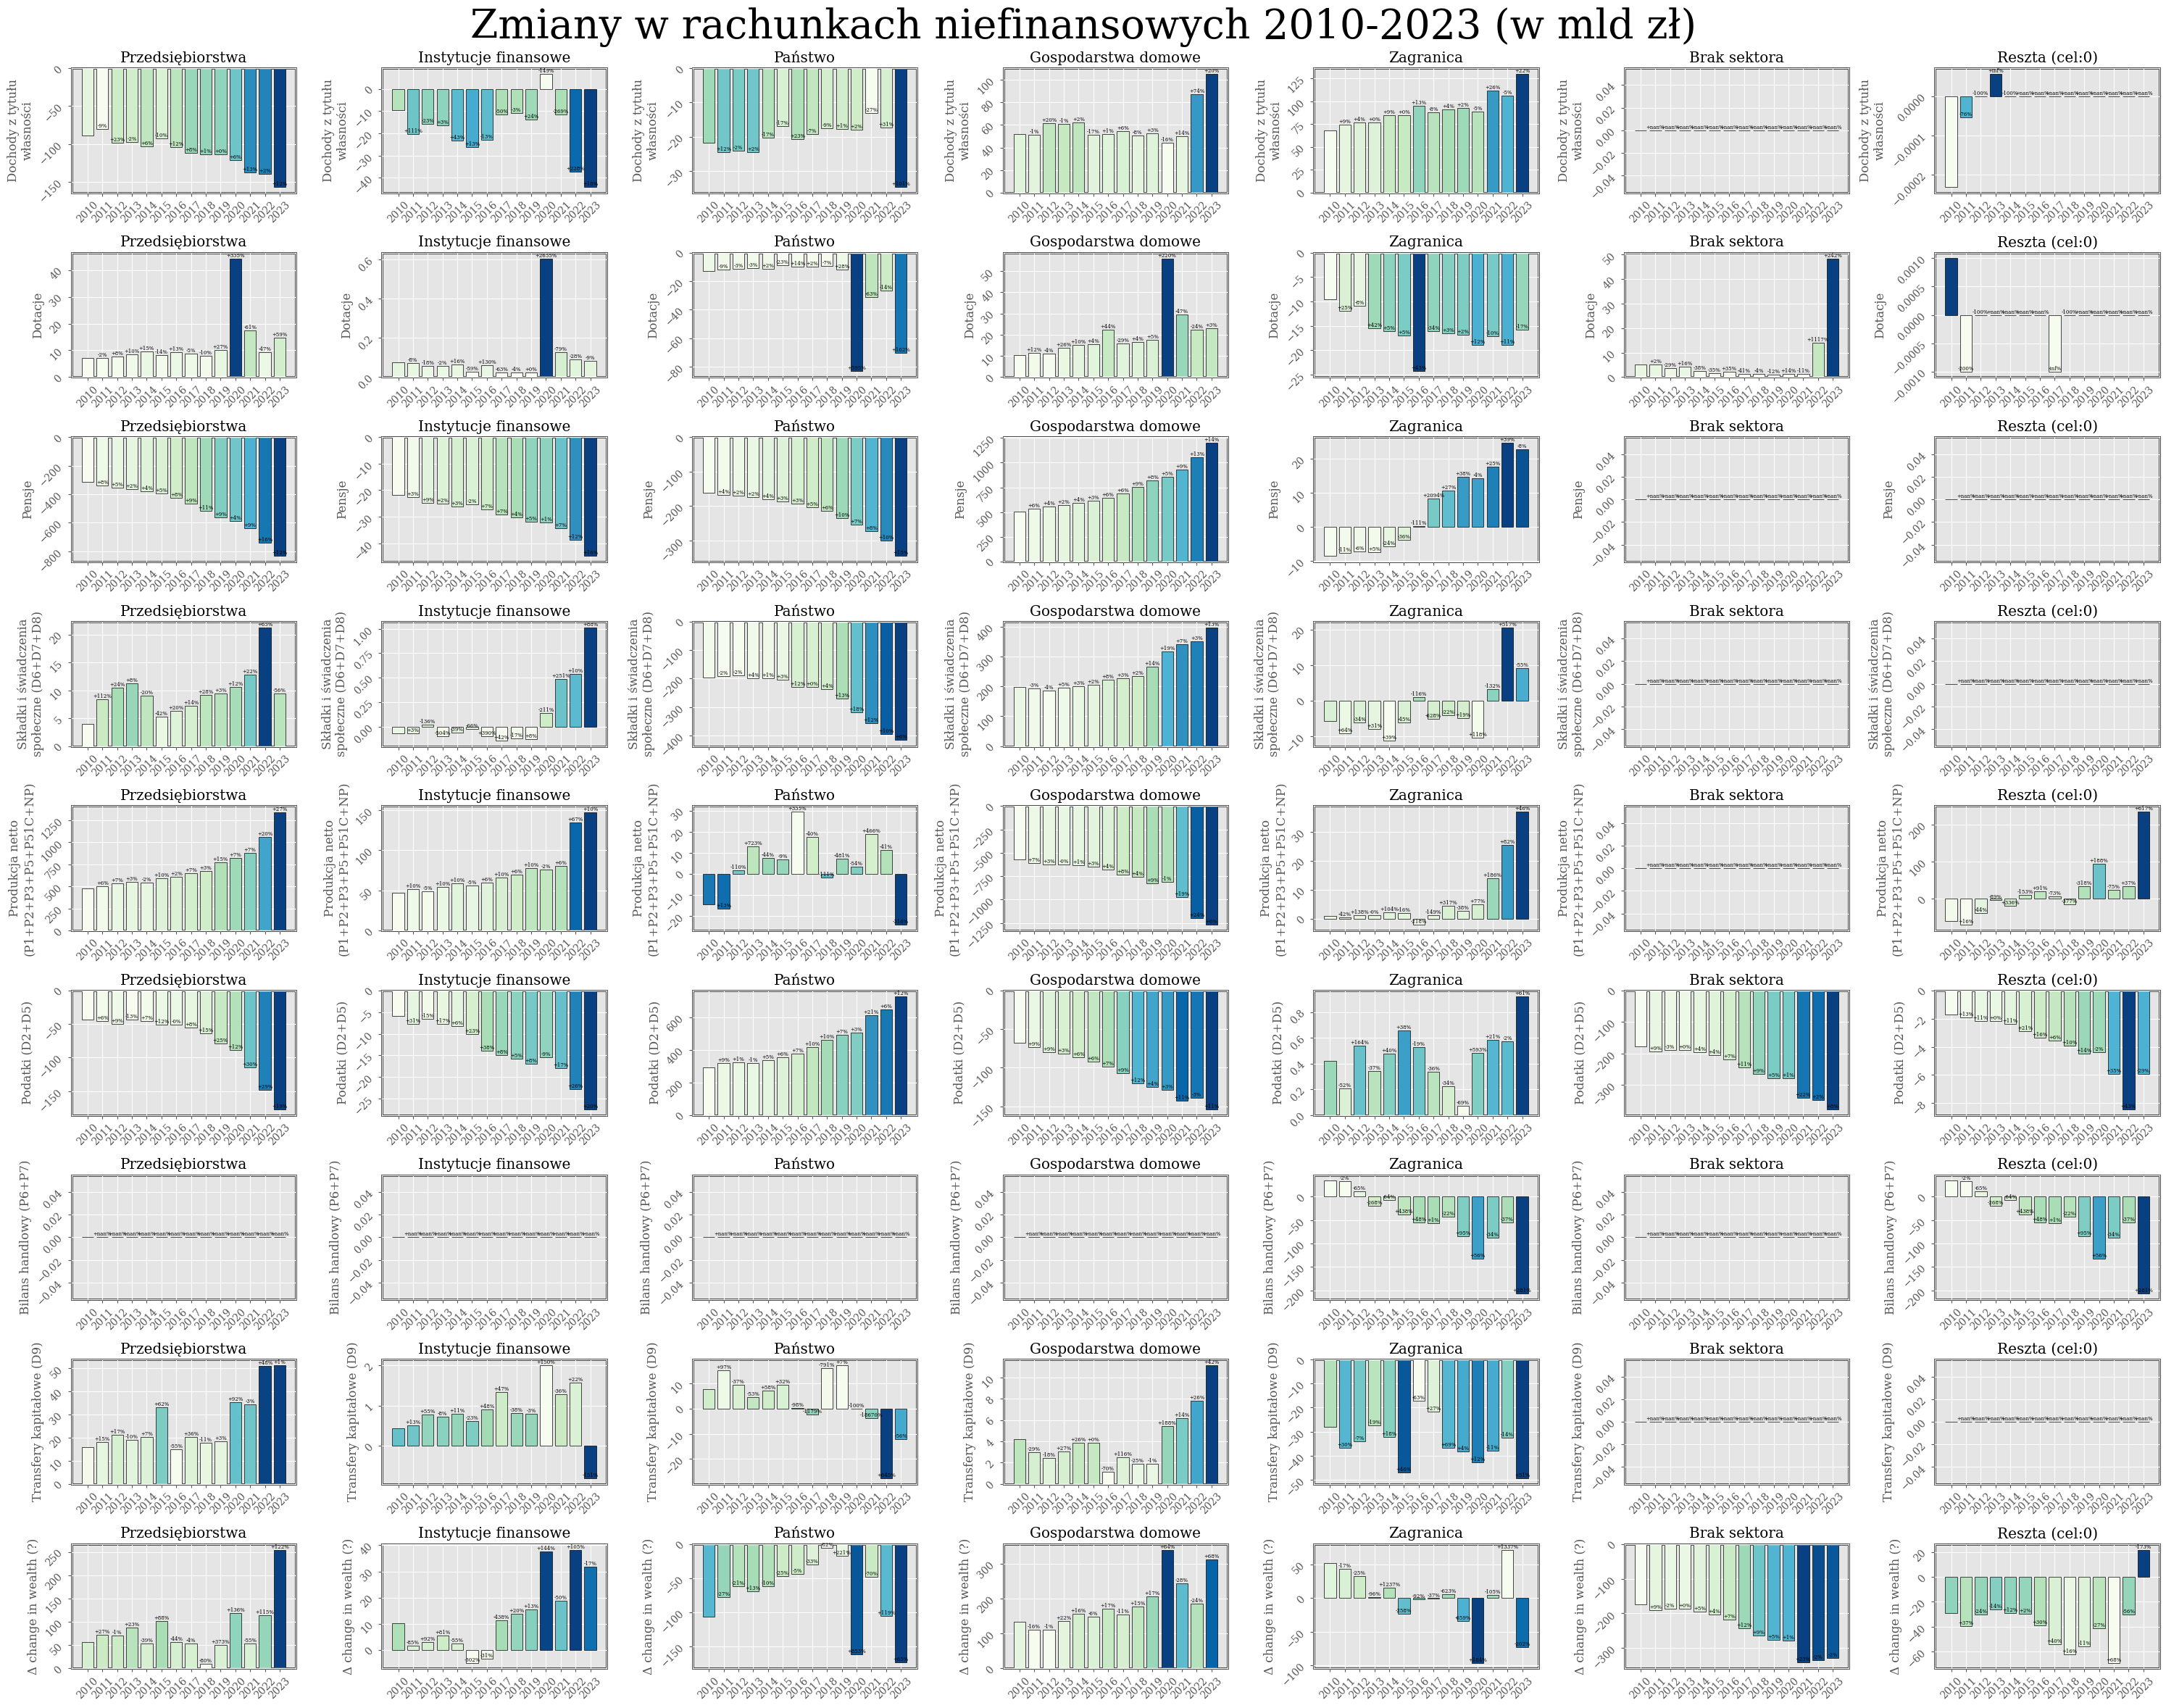

In [716]:
graph_simple_TFC_year()

### Graph setup

In [528]:
lata_int = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [529]:
lata = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
lata_int = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
house_delta = []
non_fin_cor_delta = []
fin_cor_delta = []
gov_delta = []
matrix_list = []
for rok in lata:
    loop_df = create_TFC_df_year(rok)
    loop_matrix = loop_df.drop('Suma', axis=1).to_numpy()
    house_delta.append(loop_matrix[17,3])
    non_fin_cor_delta.append(loop_matrix[17,0])
    gov_delta.append(loop_matrix[17,2])
    fin_cor_delta.append(loop_matrix[17,1])
    matrix_list.append(loop_matrix)
    
    if int(rok)%2==0:
        print(f'Rok{rok} pobrany')

Rok2010 pobrany
Rok2012 pobrany
Rok2014 pobrany
Rok2016 pobrany
Rok2018 pobrany
Rok2020 pobrany
Rok2022 pobrany


In [530]:
_2010_2023_matrix = np.array(matrix_list)
_2010_2023_matrix.shape

(14, 20, 6)

### Graph

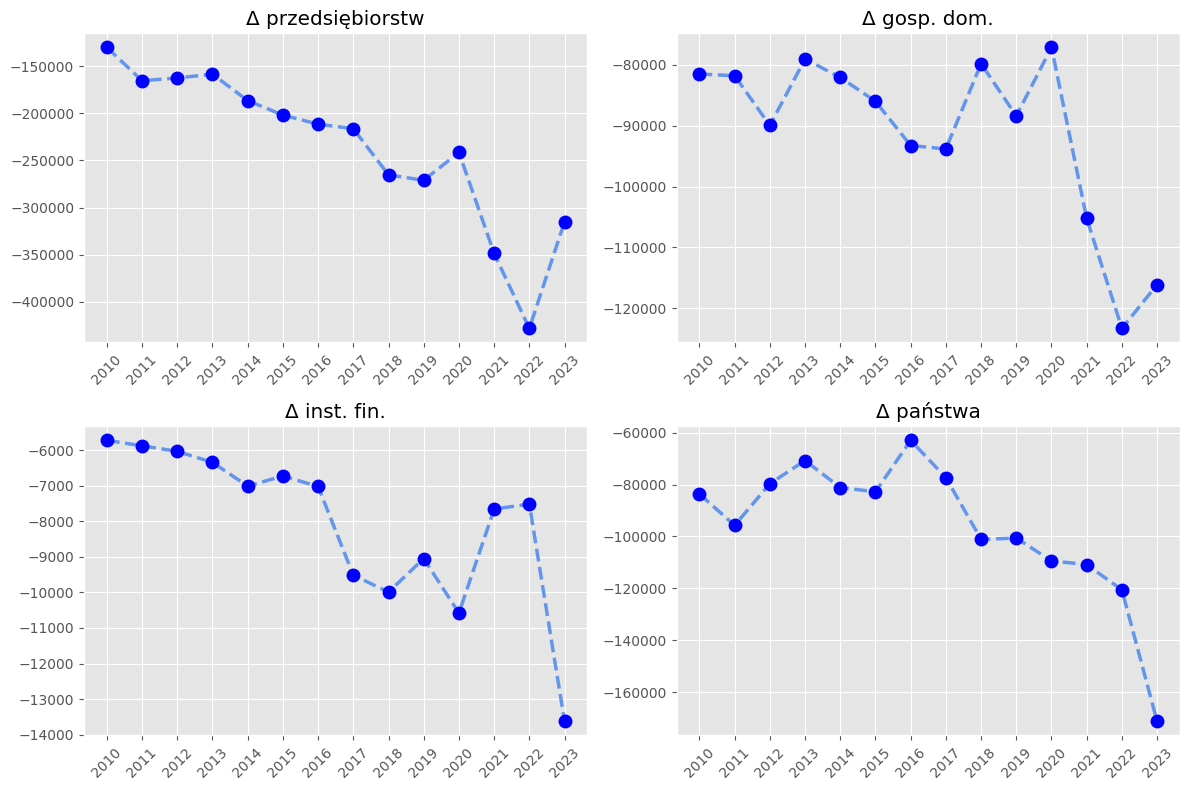

In [531]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].plot(lata_int, non_fin_cor_delta, color='cornflowerblue',marker='o', ms=9, linestyle='--', linewidth=2.5, mec='blue', mfc='blue')
axes[0,0].set_title('Δ przedsiębiorstw')
axes[0,0].set_xticks(lata_int)  # Set the tick positions
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True)


axes[0,1].plot(lata_int, house_delta, color='cornflowerblue',marker='o', ms=9, linestyle='--', linewidth=2.5, mec='blue', mfc='blue')
axes[0,1].set_title('Δ gosp. dom.')
axes[0,1].set_xticks(lata_int)  # Set the tick positions
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True)


axes[1,0].plot(lata_int, fin_cor_delta, color='cornflowerblue',marker='o', ms=9, linestyle='--', linewidth=2.5, mec='blue', mfc='blue')
axes[1,0].set_title('Δ inst. fin.')
axes[1,0].set_xticks(lata_int)  # Set the tick positions
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True)


axes[1,1].plot(lata_int, gov_delta, color='cornflowerblue',marker='o', ms=9, linestyle='--', linewidth=2.5, mec='blue', mfc='blue')
axes[1,1].set_title('Δ państwa')
axes[1,1].set_xticks(lata_int)  # Set the tick positions
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True)

plt.tight_layout()
plt.show()


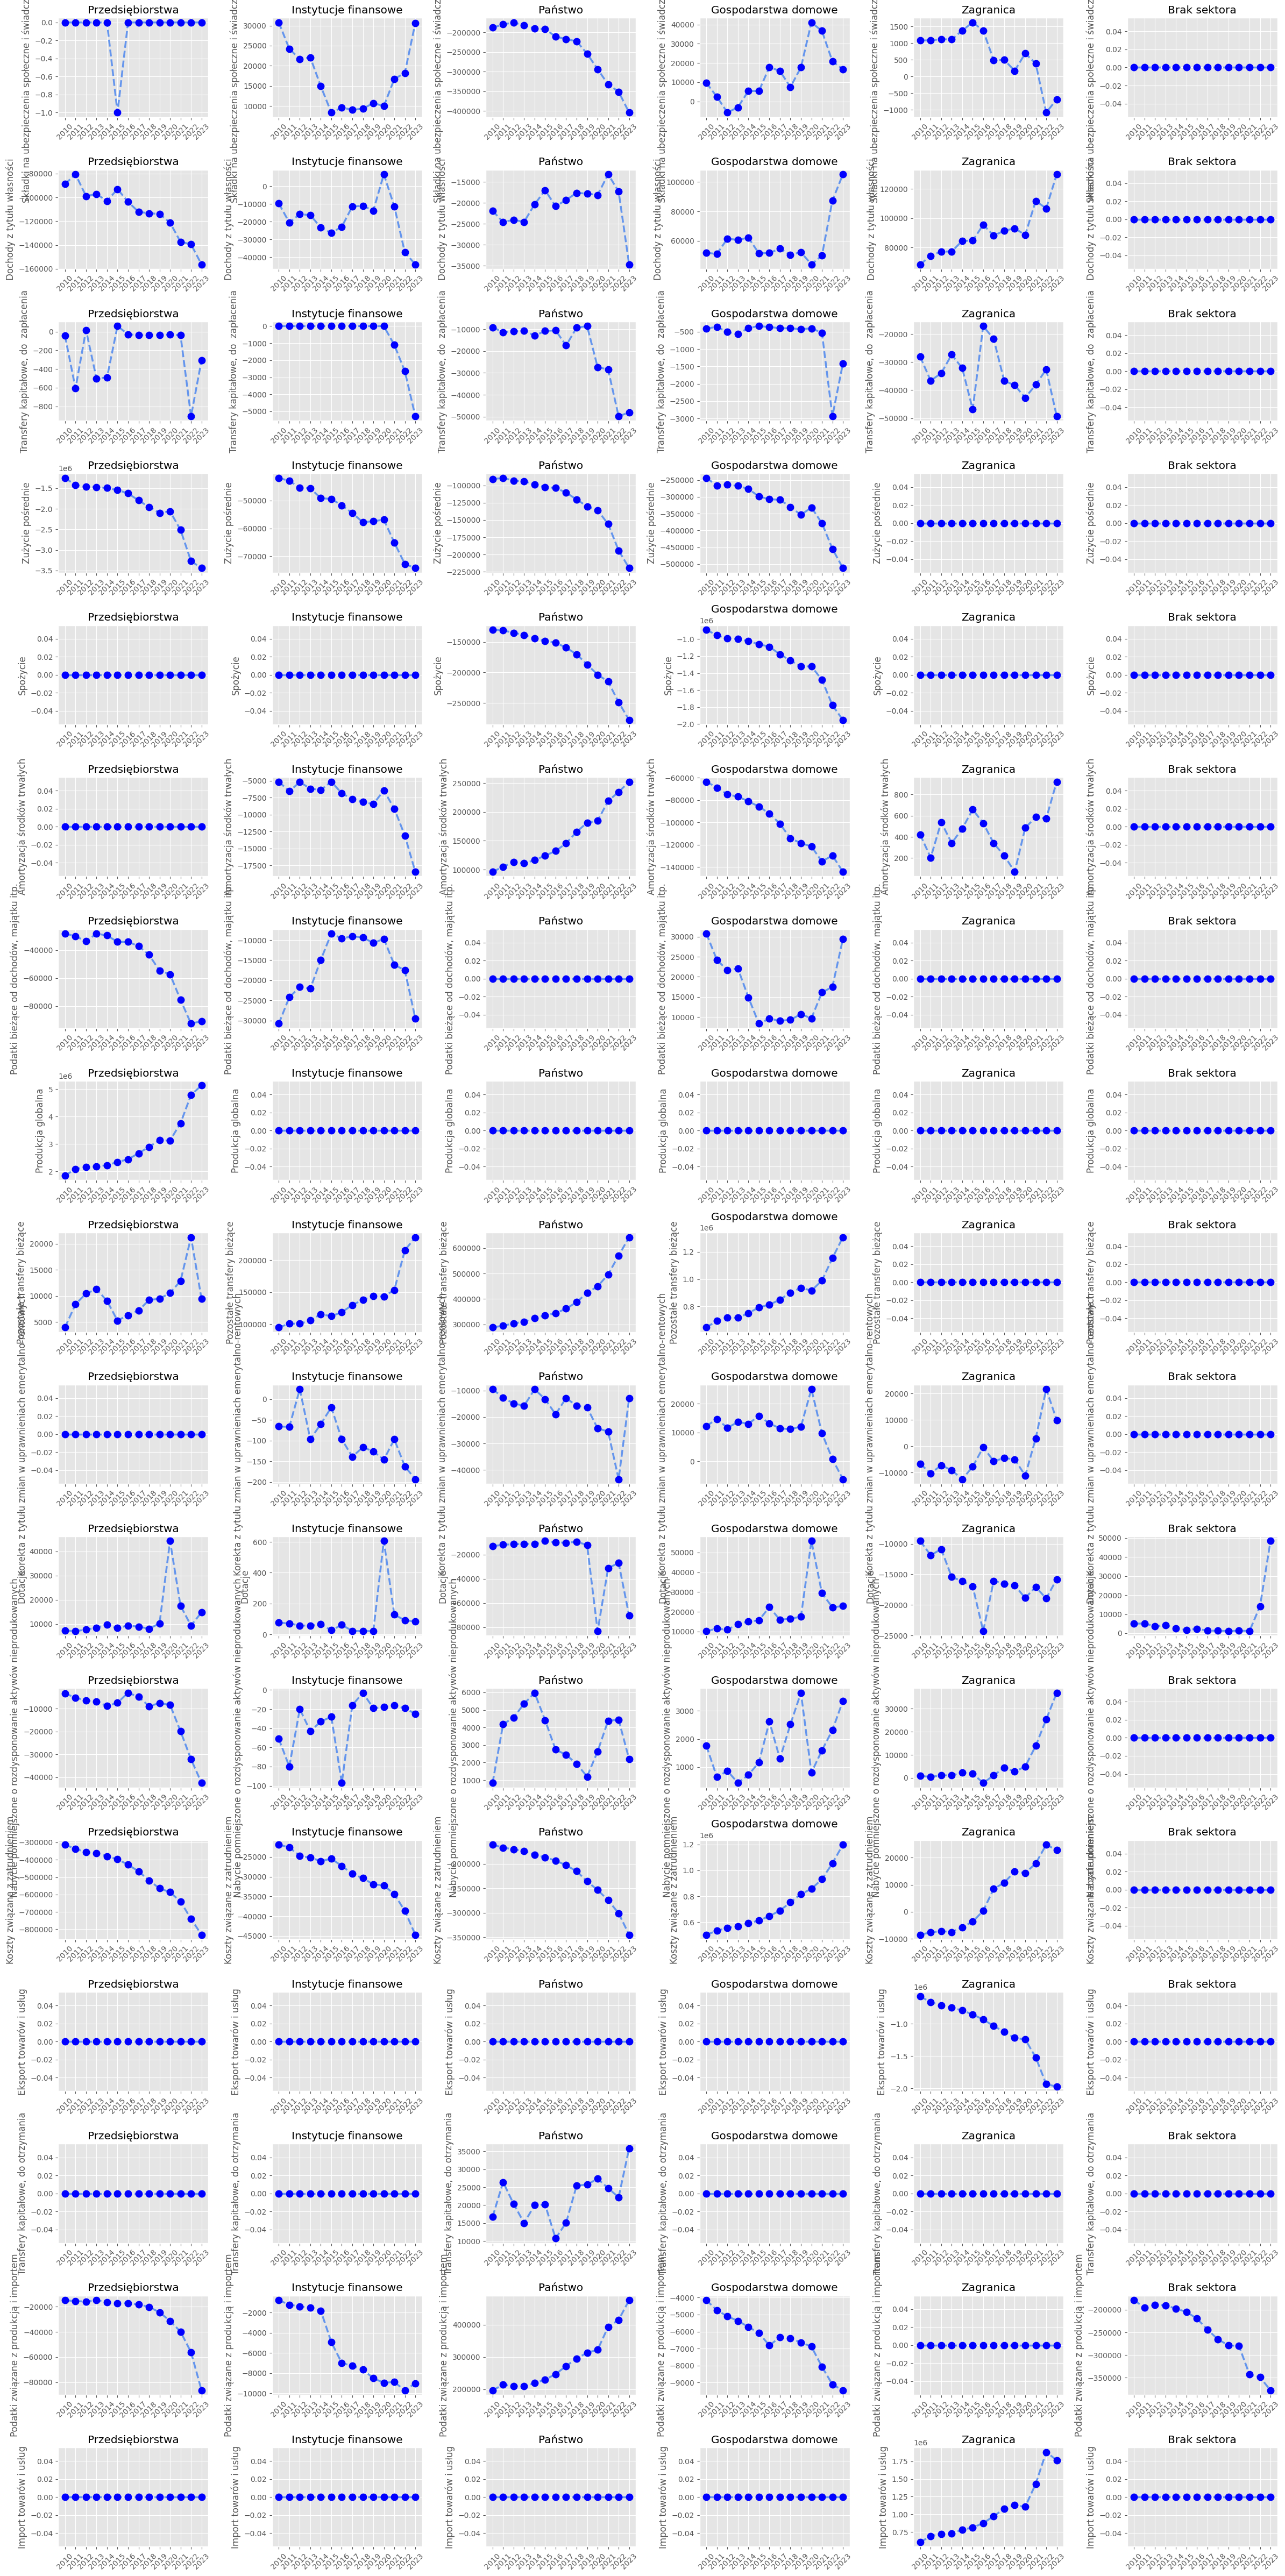

In [532]:
skalar = 0.80
fig, axes = plt.subplots(17, 6, figsize=(skalar*30, skalar*60))

# Loop through each element of the balance sheet (17 rows, 6 columns)
for i in range(17):
    for j in range(6):
        # Extract the data for the cell (i, j) across all years
        cell_values = _2010_2023_matrix[:, i, j]
        
        # Plot the changes for this cell over time
        axes[i, j].plot(lata_int, cell_values, color='cornflowerblue',marker='o', ms=9, linestyle='--', linewidth=2.5, mec='blue', mfc='blue')
        
        # Set title and labels
        axes[i, j].set_title(tfc_2023.columns[j])
        axes[i, j].set_xticks(lata_int)  # Set the tick positions
        axes[i, j].tick_params(axis='x', rotation=45)
        axes[i, j].set_ylabel(tfc_2023.index[i])
        axes[i, j].grid(True)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()